# Clustered Bar Charts

To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's **countplot** function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the **"hue"** argument:

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../Code/fuel-econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [25]:
df['trans_type']=df.trans.apply(lambda x: x.split()[0])

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

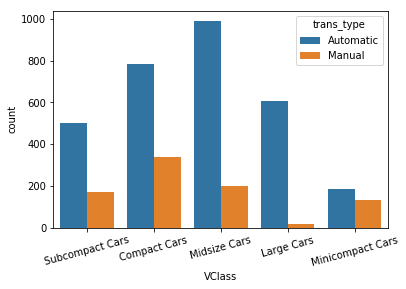

In [32]:
sb.countplot(data=df, x='VClass', hue='trans_type')
plt.xticks(rotation=15)

We can use an Axes method to set the legend properties on the Axes object returned from countplot.

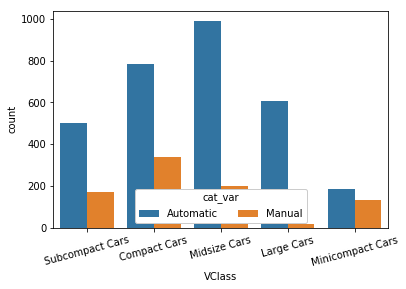

In [35]:
ax=sb.countplot(data=df, x='VClass', hue='trans_type')
plt.xticks(rotation=15)
ax.legend(ncol=2, framealpha=1, loc=8, title='cat_var')

# Alternative Approach (Heat Map)

One alternative way of depicting the relationship between two categorical variables is through a heat map. Heat maps were introduced earlier as the 2-d version of a histogram; here, we're using them as the 2-d version of a bar chart. The seaborn function heatmap is at home with this type of heat map implementation, but the input arguments are unlike most of the visualization functions that have been introduced in this course. Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.

In [38]:
ct_counts=df.groupby(['VClass','trans_type']).size()
ct_counts=ct_counts.reset_index(name='counts')
ct_counts=ct_counts.pivot(index='VClass',columns='trans_type',values='counts')

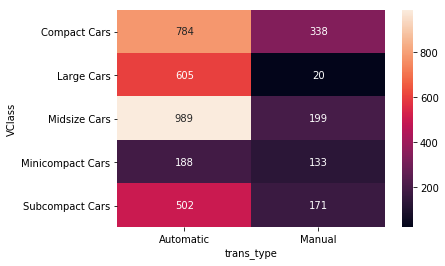

In [40]:
sb.heatmap(ct_counts ,annot=True, fmt='.0f')